In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train_treated.csv')
train.head()

id1      id2  link   rno1   rno2       sim  year1  year2  year_diff  \
0  9510123  9502114     1  16827  15446  0.064373   1995   1995          0   
1  9707075  9604178     1  21154  18059  0.021211   1997   1996          1   
2  9312155  9506142     0  13074  16171  0.017202   1993   1995         -2   
3  9911255   302165     0  27486   9702  0.012634   1999   2003         -4   
4  9701033   209076     0  19856   8212  0.059588   1997   2002         -5   

   common_authors  cn       aai  title_overlap  
0               0   1  0.513898              2  
1               0  20  4.320366              1  
2               0   0  0.000000              0  
3               0   0  0.000000              0  
4               0   0  0.000000              0

In [3]:
test = pd.read_csv('data/test_treated.csv')
test.head()

id1      id2   rno1   rno2       sim  year1  year2  year_diff  \
0  9807076  9807139  23774  23835  0.071870   1998   1998          0   
1   109162     1182   5227    172  0.163040   2001   2000          1   
2  9702187  9510135  20185  16838  0.138004   1997   1995          2   
3   111048   110115   5621   5397  0.101857   2001   2001          0   
4  9910176  9410073  27159  14643  0.091231   1999   1994          5   

   common_authors  cn        aai  title_overlap  
0               0   0   0.000000              0  
1               0  24   5.377973              2  
2               0  59  15.053612              1  
3               0  21   4.899424              1  
4               0   0   0.000000              0

## training and cross-validation

In [40]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import  MLPClassifier
from sklearn.utils import shuffle

In [44]:
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
features = ['sim', 'year_diff', 'common_authors', 'title_overlap', 'cn', 'aai']
X_train = train[features].values
y_train = train['link'].values
X_test = test[features].values
X_train.shape

(615512, 6)

In [45]:
X_train = scale(X_train)
X_test = scale(X_test)
X_train, y_train = shuffle(X_train, y_train)

In [46]:
f1_scores = []
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(10, 5), 
                        alpha=alpha, 
                        max_iter=500, 
                        tol=1e-7,
                        verbose=True)
    accuracy = cross_val_score(clf, 
                               X_train, 
                               y_train, 
                               cv=5, 
                               scoring='f1', 
                               n_jobs=-1).mean()
    f1_scores.append(accuracy)
f1_scores

Iteration 1, loss = 0.17149328
Iteration 1, loss = 0.17253996
Iteration 1, loss = 0.17208185
Iteration 1, loss = 0.17247654
Iteration 2, loss = 0.10846854
Iteration 2, loss = 0.10906090
Iteration 2, loss = 0.10843157
Iteration 2, loss = 0.10858140
Iteration 3, loss = 0.09880050
Iteration 3, loss = 0.09860207
Iteration 3, loss = 0.09818935
Iteration 3, loss = 0.09943416
Iteration 4, loss = 0.09549338
Iteration 4, loss = 0.09522234
Iteration 4, loss = 0.09557180
Iteration 4, loss = 0.09603001
Iteration 5, loss = 0.09385655
Iteration 5, loss = 0.09360567
Iteration 5, loss = 0.09480256
Iteration 5, loss = 0.09377891
Iteration 6, loss = 0.09269344
Iteration 6, loss = 0.09389292
Iteration 6, loss = 0.09212526
Iteration 6, loss = 0.09258079
Iteration 7, loss = 0.09194579
Iteration 7, loss = 0.09097167
Iteration 7, loss = 0.09162631
Iteration 7, loss = 0.09318535
Iteration 8, loss = 0.09136037
Iteration 8, loss = 0.09027871
Iteration 8, loss = 0.09076516
Iteration 8, loss = 0.09266377
Iteratio

Iteration 4, loss = 0.09603632
Iteration 5, loss = 0.09362192
Iteration 5, loss = 0.09378742
Iteration 5, loss = 0.09390341
Iteration 5, loss = 0.09480763
Iteration 6, loss = 0.09213174
Iteration 6, loss = 0.09258759
Iteration 6, loss = 0.09272948
Iteration 6, loss = 0.09389402
Iteration 7, loss = 0.09167754
Iteration 7, loss = 0.09195860
Iteration 7, loss = 0.09098320
Iteration 7, loss = 0.09318541
Iteration 8, loss = 0.09087103
Iteration 8, loss = 0.09134915
Iteration 8, loss = 0.09267229
Iteration 8, loss = 0.09029016
Iteration 9, loss = 0.09078987
Iteration 9, loss = 0.09003508
Iteration 9, loss = 0.09208082
Iteration 9, loss = 0.08974625
Iteration 10, loss = 0.09033726
Iteration 10, loss = 0.08942642
Iteration 10, loss = 0.09169307
Iteration 10, loss = 0.08941843
Iteration 11, loss = 0.08898269
Iteration 11, loss = 0.08988457
Iteration 11, loss = 0.08919283
Iteration 11, loss = 0.09114097
Iteration 12, loss = 0.08875544
Iteration 12, loss = 0.08964565
Iteration 12, loss = 0.089013

Iteration 5, loss = 0.09390460
Iteration 6, loss = 0.09261849
Iteration 6, loss = 0.09214458
Iteration 6, loss = 0.09273568
Iteration 6, loss = 0.09390166
Iteration 7, loss = 0.09167677
Iteration 7, loss = 0.09099896
Iteration 7, loss = 0.09196960
Iteration 7, loss = 0.09319910
Iteration 8, loss = 0.09030753
Iteration 8, loss = 0.09081428
Iteration 8, loss = 0.09137045
Iteration 8, loss = 0.09268335
Iteration 9, loss = 0.08976948
Iteration 9, loss = 0.09000087
Iteration 9, loss = 0.09082020
Iteration 9, loss = 0.09209208
Iteration 10, loss = 0.08944237
Iteration 10, loss = 0.08942758
Iteration 10, loss = 0.09035805
Iteration 10, loss = 0.09171320
Iteration 11, loss = 0.08921804
Iteration 11, loss = 0.08898941
Iteration 11, loss = 0.08988531
Iteration 11, loss = 0.09115938
Iteration 12, loss = 0.08903519
Iteration 12, loss = 0.08878404
Iteration 12, loss = 0.08962773
Iteration 12, loss = 0.09068434
Iteration 13, loss = 0.08890202
Iteration 13, loss = 0.08857417
Iteration 13, loss = 0.08

Iteration 12, loss = 0.08902374
Iteration 12, loss = 0.08985822
Iteration 13, loss = 0.09063890
Iteration 13, loss = 0.08913552
Iteration 13, loss = 0.08882759
Iteration 13, loss = 0.08966386
Iteration 14, loss = 0.09013241
Iteration 14, loss = 0.08902017
Iteration 14, loss = 0.08858509
Iteration 14, loss = 0.08950207
Iteration 15, loss = 0.08979917
Iteration 15, loss = 0.08891943
Iteration 15, loss = 0.08854621
Iteration 15, loss = 0.08937925
Iteration 16, loss = 0.08951975
Iteration 16, loss = 0.08883212
Iteration 16, loss = 0.08847827
Iteration 16, loss = 0.08916172
Iteration 17, loss = 0.08928284
Iteration 17, loss = 0.08869358
Iteration 17, loss = 0.08837875
Iteration 17, loss = 0.08901659
Iteration 18, loss = 0.08915545
Iteration 18, loss = 0.08835335
Iteration 18, loss = 0.08865225
Iteration 18, loss = 0.08891827
Iteration 19, loss = 0.08909430
Iteration 19, loss = 0.08829576
Iteration 19, loss = 0.08862124
Iteration 19, loss = 0.08887637
Iteration 20, loss = 0.08893933
Iteratio

Iteration 19, loss = 0.09030203
Iteration 19, loss = 0.09064043
Iteration 19, loss = 0.08990039
Iteration 20, loss = 0.09008417
Iteration 20, loss = 0.09018370
Iteration 20, loss = 0.09053489
Iteration 20, loss = 0.08980822
Iteration 21, loss = 0.08999586
Iteration 21, loss = 0.09040198
Iteration 21, loss = 0.09006449
Iteration 21, loss = 0.08977433
Iteration 22, loss = 0.09000014
Iteration 22, loss = 0.09046272
Iteration 22, loss = 0.08999135
Iteration 22, loss = 0.08966599
Iteration 23, loss = 0.09039159
Iteration 23, loss = 0.08991128
Iteration 23, loss = 0.08991688
Iteration 23, loss = 0.08968665
Iteration 24, loss = 0.09038191
Iteration 24, loss = 0.08992414
Iteration 24, loss = 0.08988242
Iteration 24, loss = 0.08968343
Iteration 25, loss = 0.09023864
Iteration 25, loss = 0.08976118
Iteration 25, loss = 0.08968155
Iteration 25, loss = 0.08960626
Iteration 26, loss = 0.08960613
Iteration 26, loss = 0.09027445
Iteration 26, loss = 0.08966658
Iteration 26, loss = 0.08962966
Iteratio

Iteration 17, loss = 0.10059161
Iteration 17, loss = 0.10057009
Iteration 17, loss = 0.10100145
Iteration 18, loss = 0.10020454
Iteration 18, loss = 0.10056021
Iteration 18, loss = 0.10056591
Iteration 18, loss = 0.10089168
Iteration 19, loss = 0.10018063
Iteration 19, loss = 0.10057910
Iteration 19, loss = 0.10057598
Iteration 19, loss = 0.10090881
Iteration 20, loss = 0.10015406
Iteration 20, loss = 0.10052854
Iteration 20, loss = 0.10078829
Iteration 20, loss = 0.10053086
Iteration 21, loss = 0.10048259
Iteration 21, loss = 0.10013212
Iteration 21, loss = 0.10071135
Iteration 21, loss = 0.10052698
Iteration 22, loss = 0.10012425
Iteration 22, loss = 0.10052908
Iteration 22, loss = 0.10078254
Iteration 22, loss = 0.10047347
Iteration 23, loss = 0.10008562
Iteration 23, loss = 0.10047418
Iteration 23, loss = 0.10069472
Iteration 23, loss = 0.10048235
Iteration 24, loss = 0.10008731
Iteration 24, loss = 0.10052576
Iteration 24, loss = 0.10074739
Iteration 24, loss = 0.10049709
Iteratio

[0.9730939013605973,
 0.9731602658902384,
 0.9731753516996374,
 0.9731238609985452,
 0.9731695146899607,
 0.9722924857977031]

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

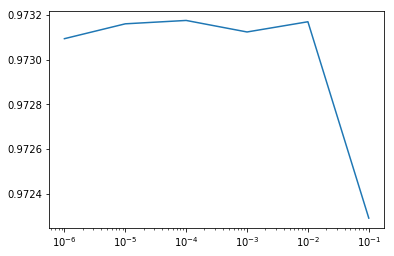

In [48]:
fig = plt.figure()
plt.xscale('log')
plt.plot(alphas, f1_scores)

In [49]:
clf = MLPClassifier(hidden_layer_sizes=(10, 5), 
                    alpha=1e-4, 
                    max_iter=500, 
                    tol=1e-7,
                    verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.15930066
Iteration 2, loss = 0.10374763
Iteration 3, loss = 0.09664742
Iteration 4, loss = 0.09451973
Iteration 5, loss = 0.09346459
Iteration 6, loss = 0.09260103
Iteration 7, loss = 0.09188563
Iteration 8, loss = 0.09133552
Iteration 9, loss = 0.09072360
Iteration 10, loss = 0.09016377
Iteration 11, loss = 0.08965315
Iteration 12, loss = 0.08905090
Iteration 13, loss = 0.08881730
Iteration 14, loss = 0.08862916
Iteration 15, loss = 0.08843771
Iteration 16, loss = 0.08830666
Iteration 17, loss = 0.08827206
Iteration 18, loss = 0.08813385
Iteration 19, loss = 0.08812339
Iteration 20, loss = 0.08804593
Iteration 21, loss = 0.08796084
Iteration 22, loss = 0.08790908
Iteration 23, loss = 0.08788038
Iteration 24, loss = 0.08783135
Iteration 25, loss = 0.08780155
Iteration 26, loss = 0.08778743
Iteration 27, loss = 0.08780319
Iteration 28, loss = 0.08779423
Iteration 29, loss = 0.08777657
Iteration 30, loss = 0.08777580
Iteration 31, loss = 0.08775563
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [50]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [51]:
y_pred = pd.Series(y_pred)
y_pred

0        0
1        1
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       0
17       1
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       0
26       1
27       1
28       0
29       0
        ..
32618    0
32619    1
32620    1
32621    0
32622    1
32623    0
32624    0
32625    0
32626    1
32627    0
32628    1
32629    0
32630    0
32631    1
32632    1
32633    0
32634    0
32635    1
32636    1
32637    0
32638    0
32639    0
32640    0
32641    0
32642    0
32643    1
32644    0
32645    0
32646    0
32647    1
Length: 32648, dtype: int64

In [52]:
sub_nn = pd.DataFrame()
sub_nn['category'] = y_pred
sub_nn

category
0             0
1             1
2             1
3             1
4             0
5             0
6             0
7             1
8             0
9             1
10            1
11            1
12            1
13            1
14            1
15            0
16            0
17            1
18            1
19            1
20            1
21            0
22            1
23            1
24            0
25            0
26            1
27            1
28            0
29            0
...         ...
32618         0
32619         1
32620         1
32621         0
32622         1
32623         0
32624         0
32625         0
32626         1
32627         0
32628         1
32629         0
32630         0
32631         1
32632         1
32633         0
32634         0
32635         1
32636         1
32637         0
32638         0
32639         0
32640         0
32641         0
32642         0
32643         1
32644         0
32645         0
32646         0
32647         1

[32648 rows x 1 columns]

In [53]:
sub_nn.index.name='id'
sub_nn.to_csv('sub_nn_1e-4.csv')

In [54]:
sub_nn.head()

category
id          
0          0
1          1
2          1
3          1
4          0